In [1]:
import os
directory = 'images'
file_list = []

for file in os.listdir(directory):
    f = os.path.join(directory, file)
    if os.path.isfile(f):
        file_list.append(f)

file_list.remove('images/.DS_Store')

In [2]:
import pandas as pd
import numpy as np

data = pd.DataFrame(file_list, columns=['file_path'])

In [3]:
data

,file_path
0,images/IMG_7009.PNG
1,images/IMG_7035.PNG
2,images/IMG_6854.JPG
3,images/IMG_3643.PNG
4,images/IMG_7431.PNG
...,...
141,images/IMG_3470.PNG
142,images/IMG_6859.JPG
143,images/IMG_6865.JPG
144,images/IMG_6118.PNG


In [4]:
from PIL import Image
import pytesseract

In [5]:
def read_text(file_path):
    return pytesseract.image_to_string(Image.open(file_path))

In [6]:
import re
import wordsegment
wordsegment.load()

def process_text(text):
    text = text.lower().replace('\n', ' ')
    text = re.sub(r'[^\w\s]', '', text)
    text = wordsegment.segment(text)
    text = ' '.join([i for i in text])
    return text

In [7]:
data['raw_text'] = data['file_path'].apply(lambda x: read_text(x))

In [8]:
data['processed_text'] = data['raw_text'].apply(lambda x: process_text(x))

In [9]:
data['text'] = data['raw_text'] + ' ' + data['processed_text']

In [10]:
data

,file_path,raw_text,processed_text,text
0,images/IMG_7009.PNG,"Give it away.\n\nThat poem you love,\nThat sav...",give it away that poem you love that saved you...,"Give it away.\n\nThat poem you love,\nThat sav..."
1,images/IMG_7035.PNG,then the voice in my bead said\nWHETHER YOU LO...,then the voice in my bead said whether you lov...,then the voice in my bead said\nWHETHER YOU LO...
2,images/IMG_6854.JPG,On a Train\n\nThe book I've been reading\nrest...,on a train the book ive been reading rests on ...,On a Train\n\nThe book I've been reading\nrest...
3,images/IMG_3643.PNG,To the Woman Crying Uncontrollably in the Next...,to the woman crying uncontrollably in the next...,To the Woman Crying Uncontrollably in the Next...
4,images/IMG_7431.PNG,"I'm falling into the flesh,\n\ninto the sadnes...",im falling into the flesh into the sadness of ...,"I'm falling into the flesh,\n\ninto the sadnes..."
...,...,...,...,...
141,images/IMG_3470.PNG,ie most you can do 1\n\ns roof.\n,ie most you can do 1sro of,ie most you can do 1\n\ns roof.\n ie most you ...
142,images/IMG_6859.JPG,Hope\n\nHope has holes\nin its pockets.\nIt le...,hope hope has holes in its pockets it leaves l...,Hope\n\nHope has holes\nin its pockets.\nIt le...
143,images/IMG_6865.JPG,From The Forward Book of Poetry 1993\n\nWendy ...,from the forward book of poetry 1993wendycopet...,From The Forward Book of Poetry 1993\n\nWendy ...
144,images/IMG_6118.PNG,Red (>)\n\nBY MARY RUEFLE\n\nI fucking depende...,red by mary ruef lei fucking depended on you a...,Red (>)\n\nBY MARY RUEFLE\n\nI fucking depende...


In [11]:
data.to_csv('poems_data.csv', index=False)

In [12]:
import spacy
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')

tokenized_text = [] 

for doc in tqdm(nlp.pipe(data['text'].fillna('').str.lower().values, disable=['tagger', 'parser', 'ner'])):
    tokenized = [token.text for token in doc if token.is_alpha]
    tokenized_text.append(tokenized)

0it [00:00, ?it/s]/Users/cluna/Library/Python/3.9/lib/python/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
146it [00:01, 100.24it/s]


In [13]:
from rank_bm25 import BM25Okapi

bm25 = BM25Okapi(tokenized_text)

In [14]:
def search_poem(query, n=3):
    tokenized_query = query.lower().split(' ')
    
    results = bm25.get_top_n(tokenized_query, data['file_path'], n)
    results_list = [poem for poem in results]

    for image in results_list:
        display(Image.open(image))

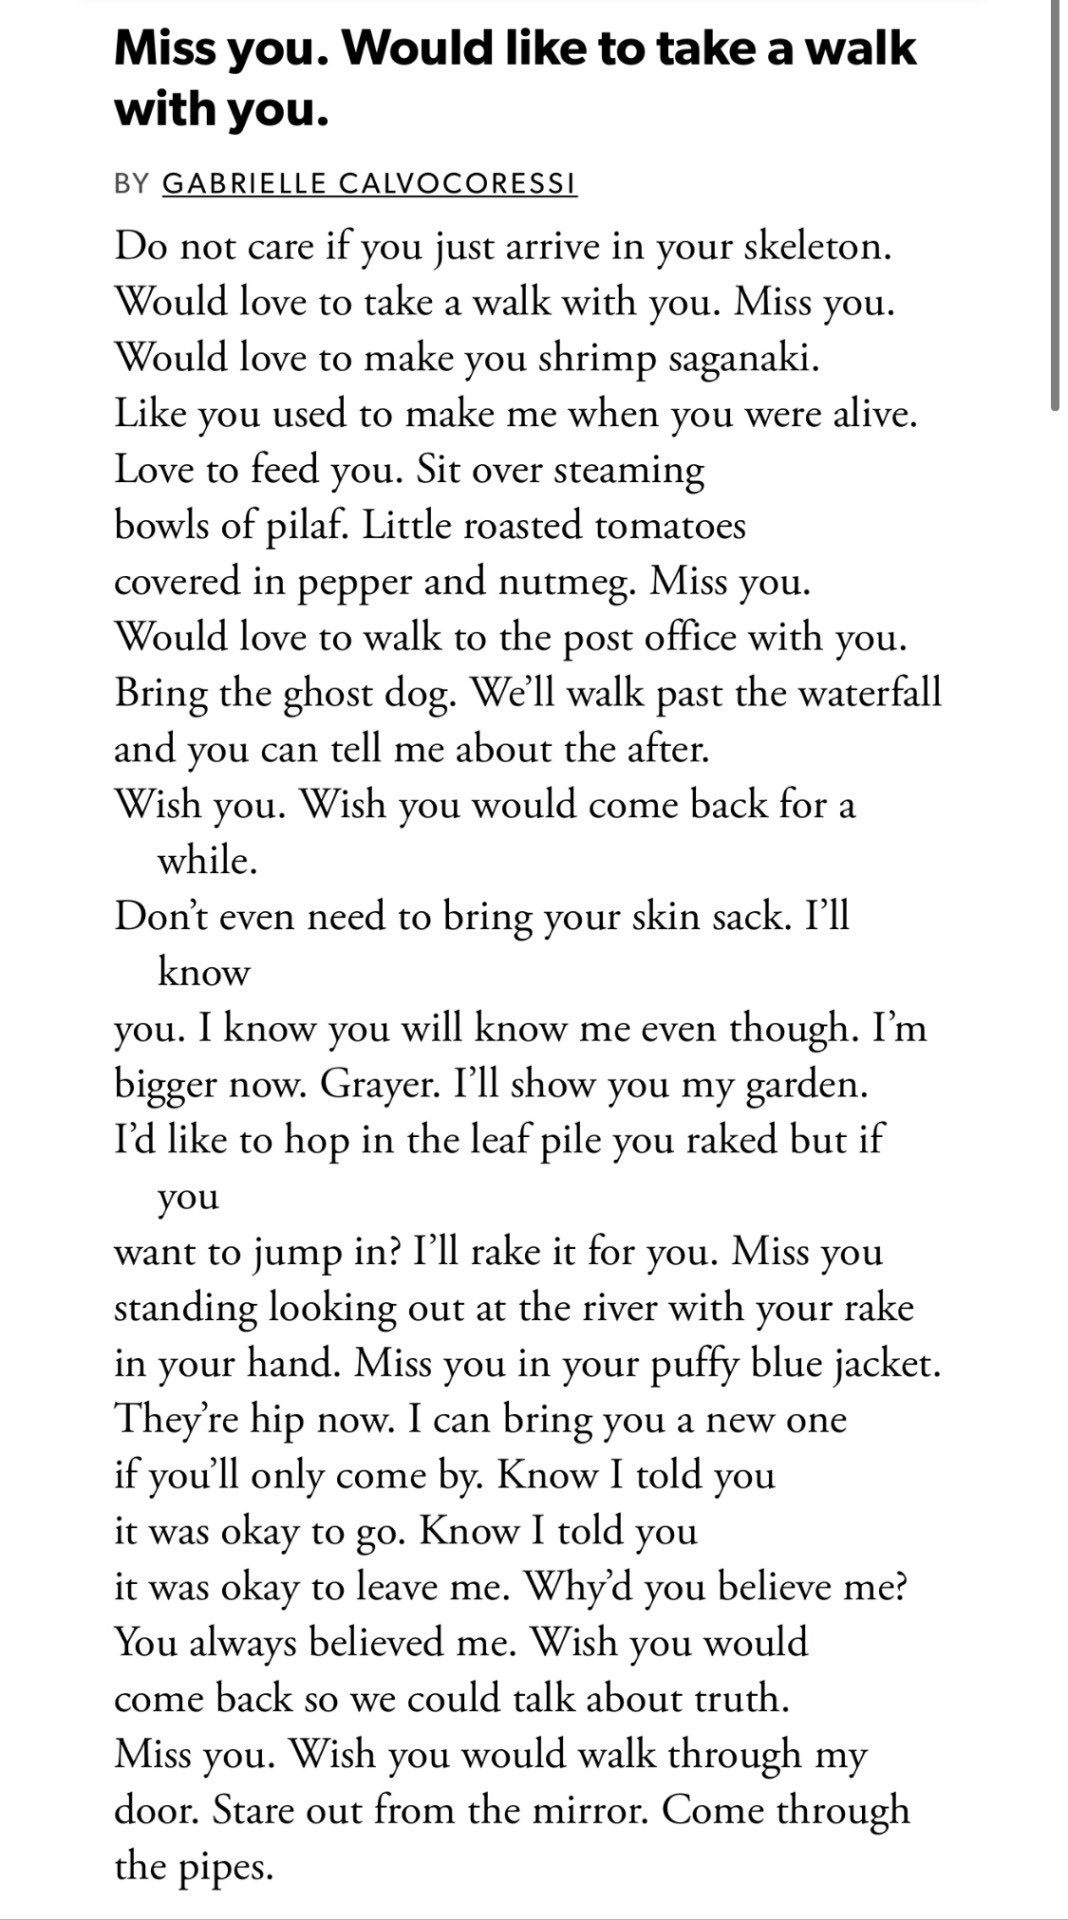

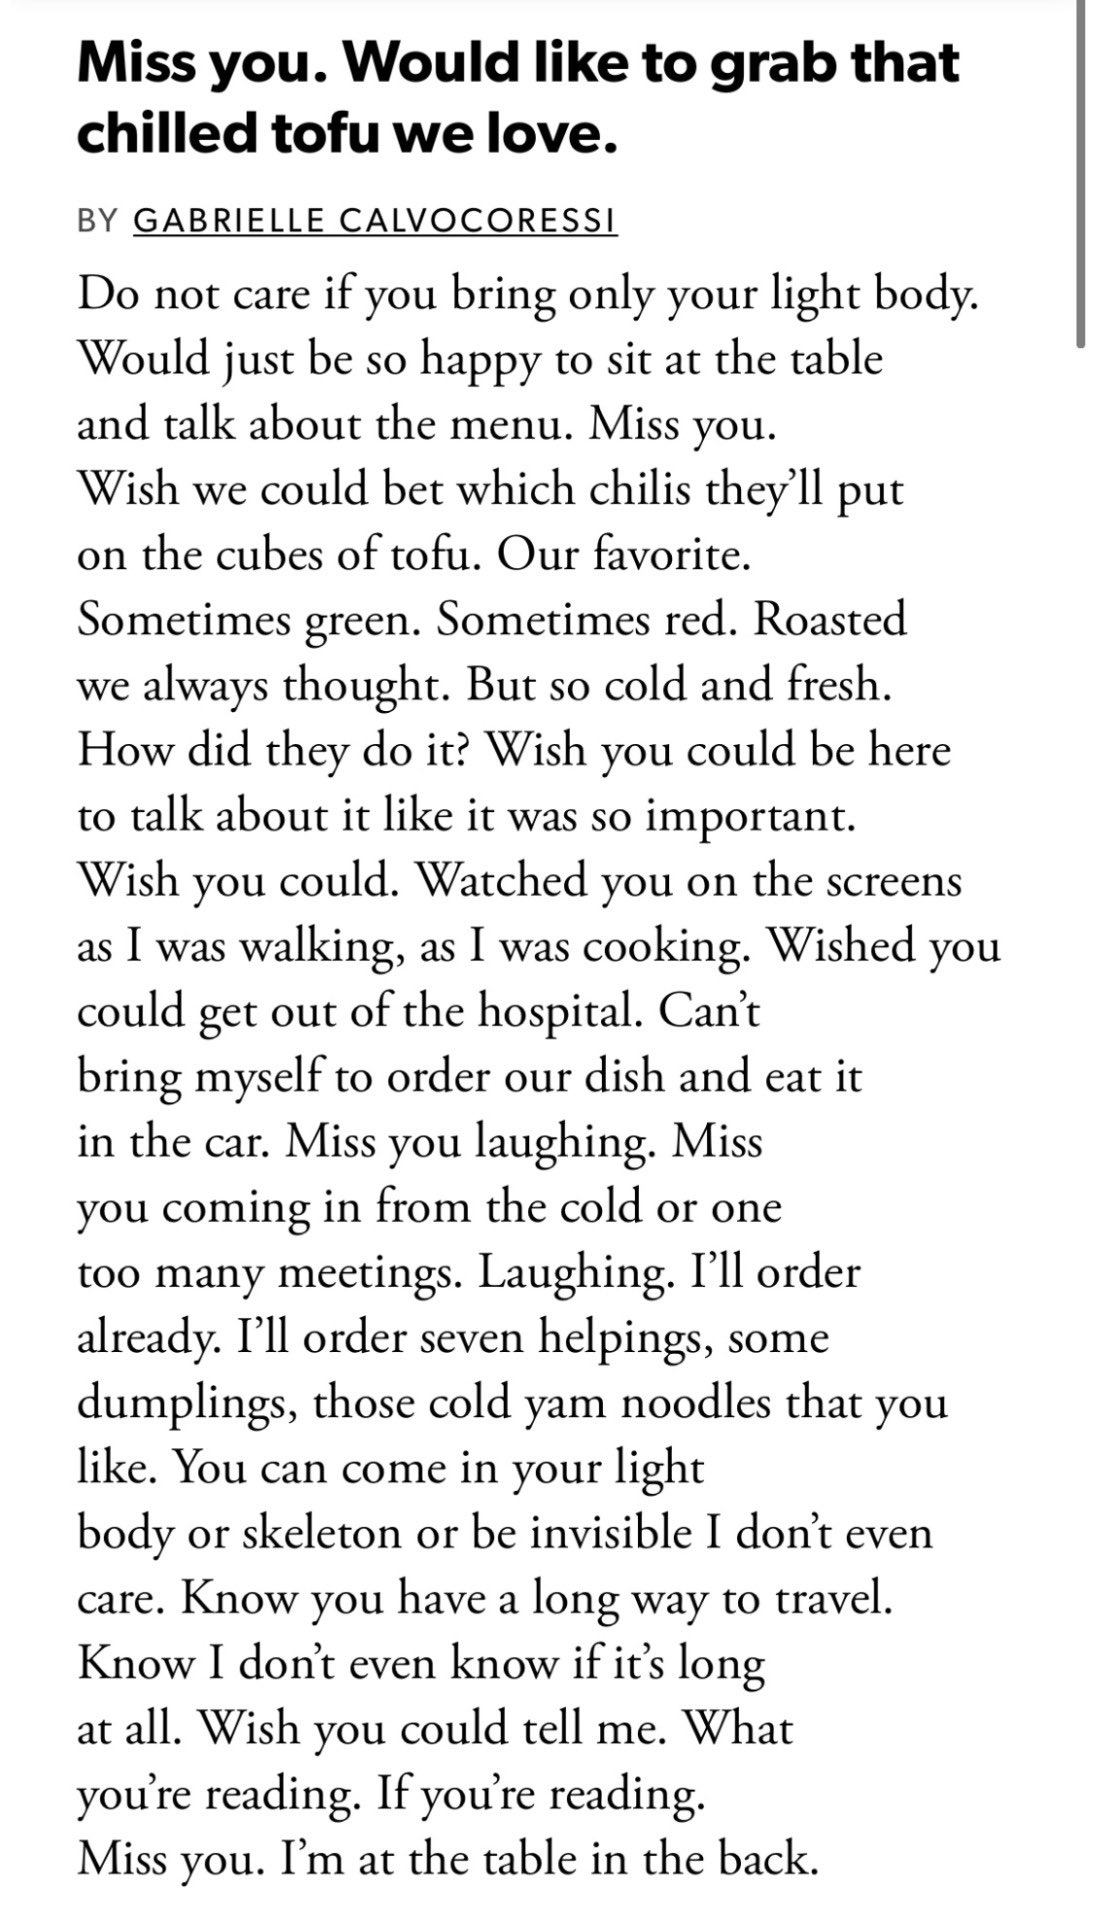

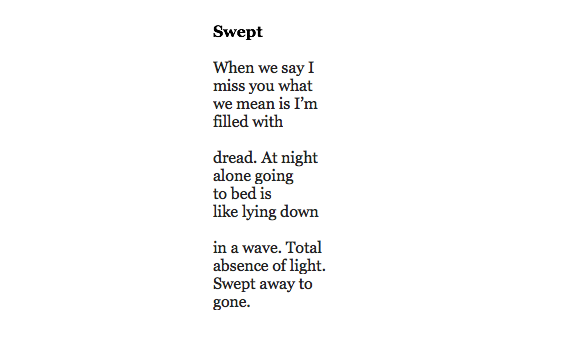

In [15]:
search_poem('miss you')